# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Importing Datasets

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# EDA

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data = train_data.drop(['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , axis = 1)
test_data = test_data.drop(['Name' , 'Ticket' , 'Cabin'] , axis = 1)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [8]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

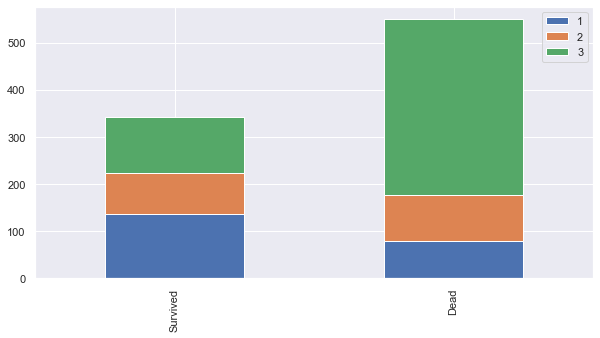

In [10]:
bar_chart('Pclass')

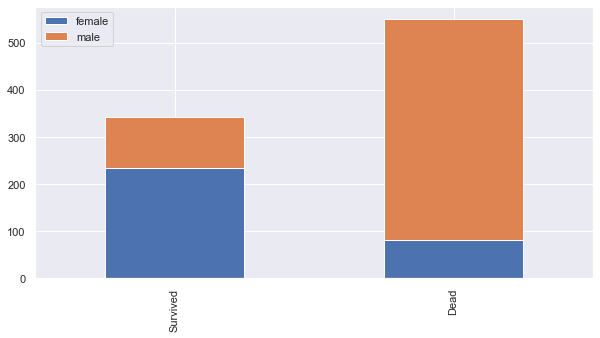

In [11]:
bar_chart('Sex')

In [12]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [15]:
train_data = train_data.drop(['SibSp' , 'Parch'] , axis = 1)
test_data = test_data.drop(['SibSp' , 'Parch'] , axis = 1)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    889 non-null    object 
 6   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


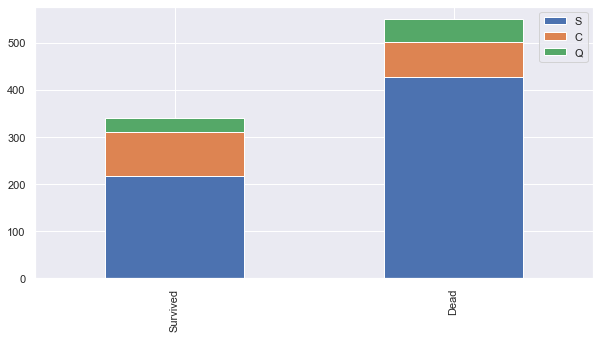

In [17]:
bar_chart('Embarked')

In [18]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [20]:
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1
5,0,3,male,28.0,8.4583,Q,1
6,0,1,male,54.0,51.8625,S,1
7,0,3,male,2.0,21.0750,S,5
8,1,3,female,27.0,11.1333,S,3
9,1,2,female,14.0,30.0708,C,2


In [21]:
sex_map = {'male': 0, 'female': 1}
train_data['Sex'] = train_data['Sex'].map(sex_map)
test_data['Sex'] = test_data['Sex'].map(sex_map)

In [22]:
emb_map = {'S': 0, 'C': 1, 'Q':2}
train_data['Embarked'] = train_data['Embarked'].map(emb_map)
test_data['Embarked'] = test_data['Embarked'].map(emb_map)

In [23]:
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,2
1,1,1,1,38.0,71.2833,1,2
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,2
4,0,3,0,35.0,8.0500,0,1
5,0,3,0,28.0,8.4583,2,1
6,0,1,0,54.0,51.8625,0,1
7,0,3,0,2.0,21.0750,0,5
8,1,3,1,27.0,11.1333,0,3
9,1,2,1,14.0,30.0708,1,2


In [24]:
test_data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,892,3,0,34.5,7.8292,2,1
1,893,3,1,47.0,7.0000,0,2
2,894,2,0,62.0,9.6875,2,1
3,895,3,0,27.0,8.6625,0,1
4,896,3,1,22.0,12.2875,0,3
5,897,3,0,14.0,9.2250,0,1
6,898,3,1,30.0,7.6292,2,1
7,899,2,0,26.0,29.0000,0,3
8,900,3,1,18.0,7.2292,1,1
9,901,3,0,21.0,24.1500,0,3


In [25]:
test_PID = test_data['PassengerId']

In [26]:
test_data = test_data.drop(['PassengerId'] , axis = 1)

In [27]:
is_NaN = test_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = test_data[row_has_NaN]
print(rows_with_NaN)

     Pclass  Sex   Age  Fare  Embarked  FamilySize
152       3    0  60.5   NaN         0           1


In [28]:
test_data['Fare'].groupby(test_data['Pclass']).median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [29]:
test_data['Fare'] = test_data['Fare'].fillna(7.8959)

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Embarked    418 non-null    int64  
 5   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [32]:
train_data['Age']=(train_data['Age']-train_data['Age'].min())/(train_data['Age'].max()-train_data['Age'].min())
train_data['Fare']=(train_data['Fare']-train_data['Fare'].min())/(train_data['Fare'].max()-train_data['Fare'].min())
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,0.271174,0.014151,0,2
1,1,1,1,0.472229,0.139136,1,2
2,1,3,1,0.321438,0.015469,0,1
3,1,1,1,0.434531,0.103644,0,2
4,0,3,0,0.434531,0.015713,0,1


In [33]:
test_data['Age']=(test_data['Age']-test_data['Age'].min())/(test_data['Age'].max()-test_data['Age'].min())
test_data['Fare']=(test_data['Fare']-test_data['Fare'].min())/(test_data['Fare'].max()-test_data['Fare'].min())
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,0.452723,0.015282,2,1
1,3,1,0.617566,0.013663,0,2
2,2,0,0.815377,0.018909,2,1
3,3,0,0.353818,0.016908,0,1
4,3,1,0.287881,0.023984,0,3


In [34]:
#Spliting test and train data
X_train = train_data.drop(['Survived'] , axis = 1)
Y_train = train_data['Survived']
X_test = test_data

# Model Building

In [35]:
# Importing Classifier Modules
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

In [38]:
scoring = 'accuracy'
score = cross_val_score(knn, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)

In [39]:
# kNN Score
round(np.mean(score)*100, 2)

79.8

#### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [42]:
score = cross_val_score(dtc, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

77.33

#### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(X_train, Y_train)

score = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

79.8

#### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [47]:
score = cross_val_score(nb, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

79.57

#### SVM

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC()
svm.fit(X_train, Y_train)

SVC()

In [50]:
score = cross_val_score(svm, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

81.03

# Prediction

In [51]:
test_data['Survived'] = svm.predict(X_test)

In [52]:
from collections import Counter
Counter(test_data.Survived)

Counter({0: 271, 1: 147})

In [53]:
data = [test_PID, test_data["Survived"]]
headers = ["PassengerId", "Survived"]
final_data = pd.concat(data, axis=1, keys=headers)

final_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [54]:
final_data.to_csv(r'D:\Data Science\Kaggle\Titanic - Machine Learning from Disaster\Final_Output.csv')